# Resumos e um pouco de Visualização no pandas


## Resumo

Vamos ver alguns métodos para analisar nossas tabelas (dataframes)

Além disso, vamos usar os plot de gráfico padrões do pandas, mas no projeto de DataScience veremos outras mais bonitas e também muito práticas.

OBS: O pandas usa o matplotlib (que vimos na seção de "módulos e bibliotecas") para plotar gráficos.<br>
Se quiser personalizar mais do que o padrão do pandas, importe o matplotlib e use os métodos do matplotlib

- Preparando as bases de dados (o que fizemos na última aula)

In [ ]:
!pip3 install pandas

In [47]:
import pandas as pd
#importando os arquivos
vendas_df = pd.read_csv(r'Contoso - Vendas - 2017.csv', sep=';')
produtos_df = pd.read_csv(r'Contoso - Cadastro Produtos.csv', sep=';', encoding='ISO-8859-1')
lojas_df = pd.read_csv(r'Contoso - Lojas.csv', sep=';', encoding='ISO-8859-1')
clientes_df = pd.read_csv(r'Contoso - Clientes.csv', sep=';', encoding='ISO-8859-1')

#limpando apenas as colunas que queremos
clientes_df = clientes_df[['ID Cliente', 'E-mail']]
produtos_df = produtos_df[['ID Produto', 'Nome do Produto']]
lojas_df = lojas_df[['ID Loja', 'Nome da Loja']]

#mesclando e renomeando os dataframes
vendas_df = vendas_df.merge(produtos_df, on='ID Produto')
vendas_df = vendas_df.merge(lojas_df, on='ID Loja')
vendas_df = vendas_df.merge(clientes_df, on='ID Cliente').rename(columns={'E-mail': 'E-mail do Cliente'})
display(vendas_df)

,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida,Nome do Produto,Nome da Loja,E-mail do Cliente
0,1,01/01/2017,02/01/2017,1,86,981,2,6825,9,1,A. Datum Advanced Digital Camera M300 Pink,Loja Contoso Austin,rbrumfieldmy@ameblo.jp
1,2,01/01/2017,06/01/2017,5,308,1586,2,18469,9,1,SV DVD 55DVD Storage Binder M56 Black,Loja Contoso North America Reseller,cshawd4@technorati.com
2,3,01/01/2017,01/01/2017,0,294,1444,5,19730,13,1,"The Phone Company Touch Screen Phones 26-2.2"" ...",Loja Contoso Tehran No.2,kgorriekd@bandcamp.com
3,4,01/01/2017,01/01/2017,0,251,1468,5,29326,6,1,Contoso Touch Screen Phones - CRT M11 Black,Loja Contoso Singapore,angela49@adventure-works.com
4,5,01/01/2017,07/01/2017,6,94,1106,2,22617,4,1,Contoso SLR Camera M146 Orange,Loja Contoso Grand Prairie,jacob4@adventure-works.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...
980637,980638,31/12/2017,31/12/2017,0,194,2490,4,10353,120,0,Contoso Rubberized Skin BlackBerry E100 White,Loja Contoso Ridgely,ocrosson9u@illinois.edu
980638,980639,31/12/2017,06/01/2018,6,32,2488,4,31750,120,0,Contoso Rubberized Skin BlackBerry E100 Black,Loja Contoso Milliken,victor11@adventure-works.com
980639,980640,31/12/2017,03/01/2018,3,210,2511,10,12003,80,0,Contoso Original K1m Li-Ion Standard Battery E...,Loja Contoso Cheshire,mtopaz4@gmpg.org
980640,980641,31/12/2017,31/12/2017,0,53,436,4,25550,39,0,Adventure Works Desktop PC1.80 ED180 White,Loja Contoso East Troy,lance5@adventure-works.com


### Qual cliente que comprou mais vezes?

- Usaremos o método .value_counts() para contar quantas vezes cada valor do Dataframe aparece
- Usaremos o método .plot() para exibir um gráfico

E-mail do Cliente
karen33@adventure-works.com      77
chloe77@adventure-works.com      74
julia43@adventure-works.com      69
gilbert9@adventure-works.com     68
destiny66@adventure-works.com    68
                                 ..
mblemen9o@ebay.com                1
rebecca15@adventure-works.com     1
kevin10@adventure-works.com       1
siliffe8l@spotify.com             1
clifford8@adventure-works.com     1
Name: count, Length: 38907, dtype: int64

<Axes: xlabel='E-mail do Cliente'>

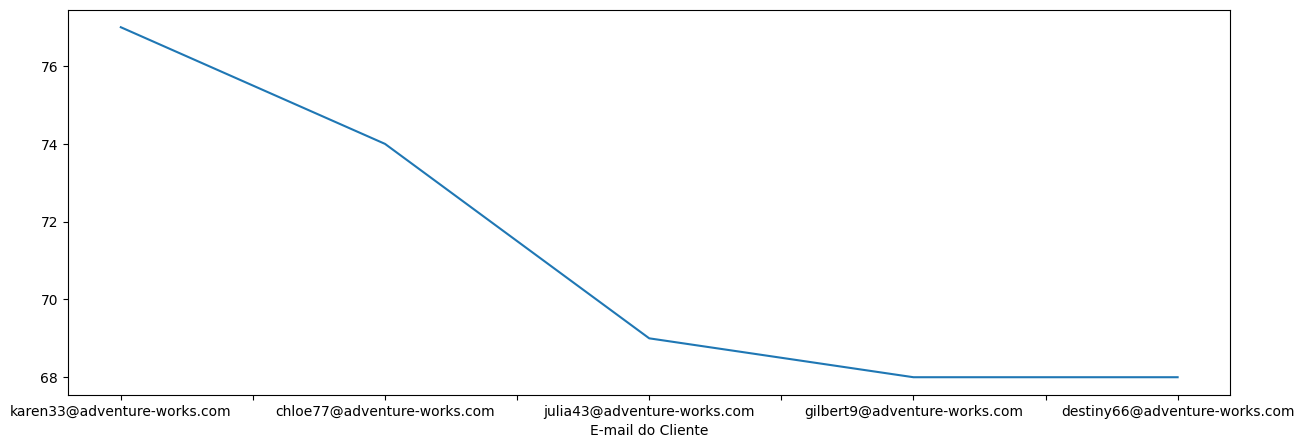

In [39]:
frequencia_clientes = vendas_df['E-mail do Cliente'].value_counts()

display(frequencia_clientes)

# mostrando os primeiro cinco clientes que mais compraram
frequencia_clientes[:5].plot(figsize=(15, 5))

### Qual a Loja que mais vendeu?

- Usaremos o .groupby para agrupar o nosso dataframe, de acordo com o que queremos (somando as quantidades de vendas, por exemplo)

In [40]:
# através do groupby, estaremos agrupando as lojas e somando a quantidade de vendas realizadas por cada uma em si
vendas_lojas = vendas_df.groupby('Nome da Loja').sum()
vendas_lojas = vendas_lojas[['Quantidade Vendida']]

display(vendas_lojas)

,Quantidade Vendida
Nome da Loja,
Loja Contoso Albany,26353
Loja Contoso Alexandria,26247
Loja Contoso Amsterdam,28294
Loja Contoso Anchorage,27451
Loja Contoso Annapolis,26065
...,...
Loja Contoso Yokohama,28023
Loja Contoso York,27164
Loja Contoso koln No.1,29046


- Agora precisamos pegar o maior valor. Temos 2 formas:
    1. Ordenar o dataframe em ordem decrescente de Quantidade Vendida
        - Método .sort_values
    2. Pegar o Maior valor diretamente
        - Métodos .max() e .idxmax()

,Quantidade Vendida
Nome da Loja,
Loja Contoso Catalog,1029117
Loja Contoso North America Online,701961
Loja Contoso Europe Online,616845
Loja Contoso Asia Online,578458
Loja Contoso North America Reseller,520176
...,...
Loja Contoso Berlin,379
Loja Contoso Paterson,371
Loja Contoso Marseille,370


<Axes: xlabel='Nome da Loja'>

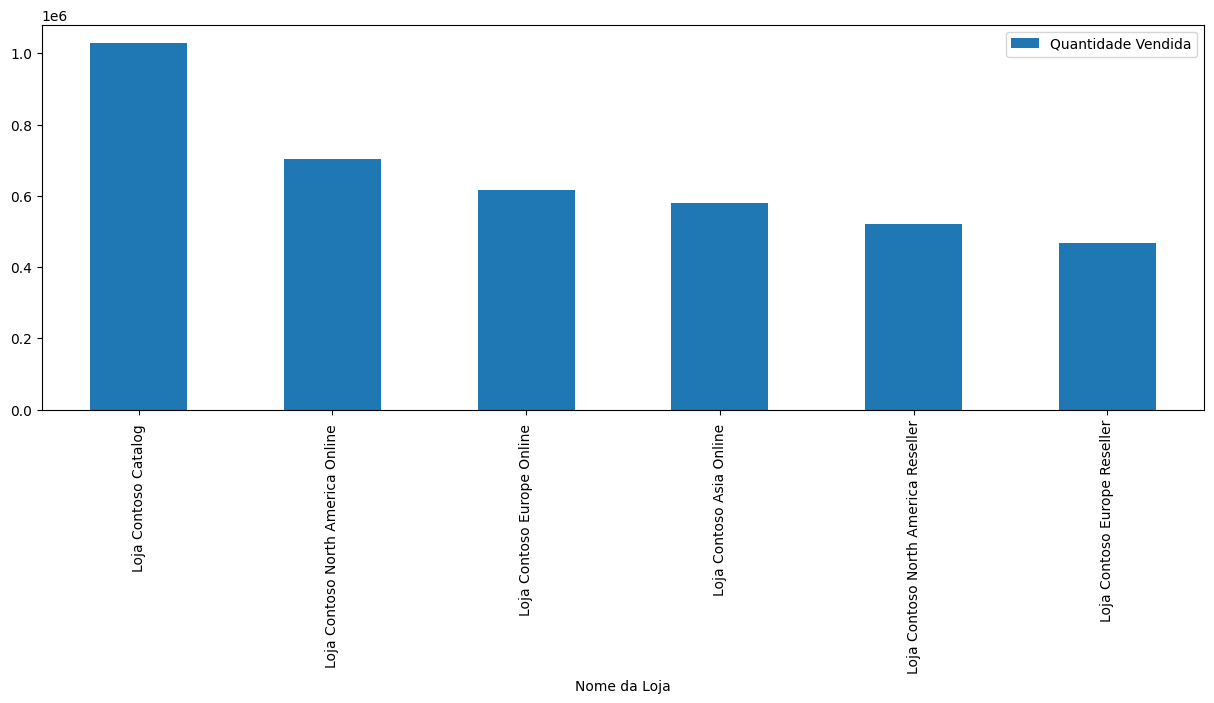

In [41]:
#ordenando o dataframe
vendas_lojas = vendas_lojas.sort_values('Quantidade Vendida', ascending=False)
display(vendas_lojas)

#podemos plotar em um gráfico
vendas_lojas[:6].plot(kind='bar',figsize=(15,5))


In [42]:
#pegando o maior valor e seu índice
maior_quantidade_vendida = vendas_lojas['Quantidade Vendida'].max()
loja_maior_quantidade_vendida = vendas_lojas['Quantidade Vendida'].idxmax()

print(f'Loja com maior quantidade de vendas: {loja_maior_quantidade_vendida}\nQuantidade de vendas: {maior_quantidade_vendida}')

Loja com maior quantidade de vendas: Loja Contoso Catalog 
Quantidade de vendas: 1029117


### Qual produto que menos vendeu?

- Já temos uma lista criada para isso, basta verificarmos o final da lista (já que ela está ordenada) ou então usarmos os métodos:
    1. min()
    2. idxmin()

In [43]:
menor_quantidade_vendida = vendas_lojas['Quantidade Vendida'].min()
loja_menor_quantidade_vendida = vendas_lojas['Quantidade Vendida'].idxmin()

print(f'Loja com menor quantidade de vendas: {loja_menor_quantidade_vendida}\nQuantidade de vendas: {menor_quantidade_vendida}')

# trazendo somente o último item da lista(dataframe)
vendas_lojas[-1:]

Loja com menor quantidade de vendas: Loja Contoso Venezia 
Quantidade de vendas: 234


,Quantidade Vendida
Nome da Loja,
Loja Contoso Venezia,234


**Primeiro, vamos aplicar uma função normalmente. Qual é a % de vendas que foi devolvida?**
- para isso vamos somar as quantidade nas colunas correspondentes. Lembrando, que o % vai ser: Total Devolvido / Total Vendido

In [44]:
quantidade_vendida = vendas_df['Quantidade Vendida'].sum()
quantidade_devolvida = vendas_df['Quantidade Devolvida'].sum()

percent_vendas_devolvidas = quantidade_devolvida / quantidade_vendida

print(f'O percentual de vendas devolvidas foi de: {percent_vendas_devolvidas:.2%}')

O percentual de vendas devolvidas foi de: 1.17%


**Agora, se quisermos fazer a mesma análise apenas para uma loja específica. Queremos filtrar apenas os itens da loja Contoso Europe Online e saber o % de devolução dessa loja.**
- Para isso, vamos precisar filtrar. A forma de filtrar nos dataframes é uma 'simples' comparação

In [45]:
# filtrando dataframe através do ID da Loja
vendas_loja_contoso_europe_online = vendas_df[vendas_df['ID Loja'] == 306]

quantidade_vendida = vendas_loja_contoso_europe_online['Quantidade Vendida'].sum()
quantidade_devolvida = vendas_loja_contoso_europe_online['Quantidade Devolvida'].sum()

percent_vendas_devolvidas = quantidade_devolvida / quantidade_vendida

print(f'O percentual de vendas devolvidas da Loja Contoso Europe Online foi de: {percent_vendas_devolvidas:.2%}')

O percentual de vendas devolvidas da Loja Contoso Europe Online foi de: 1.33%


**Vamos fazer em 2 passos para entender direitinho o que está acontecendo**

In [49]:
# filtrando dataframe através do ID da Loja
# vendas_loja_contoso_europe_online = vendas_df[vendas_df['ID Loja'] == 306]

loja_306 = vendas_df['ID Loja'] == 306

vendas_loja_contoso_europe_online = vendas_df[loja_306]

display(vendas_loja_contoso_europe_online)

,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida,Nome do Produto,Nome da Loja,E-mail do Cliente
98,99,01/01/2017,03/01/2017,2,306,1269,10,26238,8,0,Contoso Carrying Case E312 Blue,Loja Contoso Europe Online,edward17@adventure-works.com
165,166,01/01/2017,02/01/2017,1,306,1107,10,7242,16,0,"Contoso SLR Camera 35"" M358 Orange",Loja Contoso Europe Online,khanhard6r@taobao.com
166,167,01/01/2017,05/01/2017,4,306,242,10,34277,16,0,Contoso Home Theater System 7.1 Channel M1700 ...,Loja Contoso Europe Online,marshall24@adventure-works.com
186,187,01/01/2017,06/01/2017,5,306,1479,10,23132,8,0,The Phone Company Smart phones Unlocked Intern...,Loja Contoso Europe Online,cynthia4@adventure-works.com
198,199,01/01/2017,03/01/2017,2,306,819,10,5363,4,0,Contoso Laptop Cooling Hub notebook fan with 4...,Loja Contoso Europe Online,svirgoea4@blogtalkradio.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...
980579,980580,31/12/2017,06/01/2018,6,306,771,10,6539,8,0,Contoso USB Wave Multi-media Keyboard E280 Black,Loja Contoso Europe Online,hgauntleyf0@smh.com.au
980580,980581,31/12/2017,01/01/2018,1,306,591,10,32061,8,0,Contoso Projector 480p M480 White,Loja Contoso Europe Online,gina18@adventure-works.com
980581,980582,31/12/2017,31/12/2017,0,306,1388,10,22838,8,0,Contoso Private Branch Exchange M88 Grey,Loja Contoso Europe Online,alexa14@adventure-works.com
980582,980583,31/12/2017,03/01/2018,3,306,1354,10,33450,8,0,Contoso Hybrid system M60 White,Loja Contoso Europe Online,alexis3@adventure-works.com


**Desafio: E se eu quisesse criar uma tabela apenas com as vendas da Loja Contoso Europe Online e que não tiveram nenhuma devolução. Quero criar essa tabela e saber quantas vendas são.**
- Repare que nesse caso são 2 condições, como fazemos isso?

In [ ]:
# tudo junto
dataframe_loja306_semdev = vendas_df[(vendas_df['ID Loja'] == 306) & (vendas_df['Quantidade Devolvida'] == 0)]
display(dataframe_loja306_semdev)


# separado
loja_306 = vendas_df['ID Loja'] == 306
quantidade_devolvida_zero = vendas_df['Quantidade Devolvida'] == 0
dataframe2_loja306_semdev = vendas_df[loja_306 & quantidade_devolvida_zero]

display(dataframe2_loja306_semdev)


,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida,Nome do Produto,Nome da Loja,E-mail do Cliente
98,99,01/01/2017,03/01/2017,2,306,1269,10,26238,8,0,Contoso Carrying Case E312 Blue,Loja Contoso Europe Online,edward17@adventure-works.com
165,166,01/01/2017,02/01/2017,1,306,1107,10,7242,16,0,"Contoso SLR Camera 35"" M358 Orange",Loja Contoso Europe Online,khanhard6r@taobao.com
166,167,01/01/2017,05/01/2017,4,306,242,10,34277,16,0,Contoso Home Theater System 7.1 Channel M1700 ...,Loja Contoso Europe Online,marshall24@adventure-works.com
186,187,01/01/2017,06/01/2017,5,306,1479,10,23132,8,0,The Phone Company Smart phones Unlocked Intern...,Loja Contoso Europe Online,cynthia4@adventure-works.com
198,199,01/01/2017,03/01/2017,2,306,819,10,5363,4,0,Contoso Laptop Cooling Hub notebook fan with 4...,Loja Contoso Europe Online,svirgoea4@blogtalkradio.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...
980579,980580,31/12/2017,06/01/2018,6,306,771,10,6539,8,0,Contoso USB Wave Multi-media Keyboard E280 Black,Loja Contoso Europe Online,hgauntleyf0@smh.com.au
980580,980581,31/12/2017,01/01/2018,1,306,591,10,32061,8,0,Contoso Projector 480p M480 White,Loja Contoso Europe Online,gina18@adventure-works.com
980581,980582,31/12/2017,31/12/2017,0,306,1388,10,22838,8,0,Contoso Private Branch Exchange M88 Grey,Loja Contoso Europe Online,alexa14@adventure-works.com
980582,980583,31/12/2017,03/01/2018,3,306,1354,10,33450,8,0,Contoso Hybrid system M60 White,Loja Contoso Europe Online,alexis3@adventure-works.com
